In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import pandas as pd

links = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\links.csv')
movies = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\movies.csv')
tags = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\tags.csv')  # Assuming 'tags.csv' is intended
ratings = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\ratings.csv')


In [13]:
# Display the first 5 rows of each DataFrame
print("Links DataFrame Head:")
print(links.head(), "\n")

print("Movies DataFrame Head:")
print(movies.head(), "\n")

print("Tags DataFrame Head:")
print(tags.head(), "\n")

print("Ratings DataFrame Head:")
print(ratings.head(), "\n")



Links DataFrame Head:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 

Movies DataFrame Head:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Tags DataFrame Head:


   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200 

Ratings DataFrame Head:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931 



In [14]:
# Display the last 5 rows of each DataFrame
print("Links DataFrame Tail:")
print(links.tail(), "\n")

print("Movies DataFrame Tail:")
print(movies.tail(), "\n")

print("Tags DataFrame Tail:")
print(tags.tail(), "\n")

print("Ratings DataFrame Tail:")
print(ratings.tail(), "\n")

Links DataFrame Tail:
      movieId   imdbId    tmdbId
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0 

Movies DataFrame Tail:
      movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
9737  Action|Animation|Comedy|Fantasy  
9738         Animation|Comedy|Fantasy  
9739                            Drama  
9740                 Action|Animation  
9741                           Comedy   

Tags DataFrame Tail:
      userId  movieId               tag   timestamp
3678     606     7382         for katie  1171234019
3679     606     7936      

**Checking for missing values**

In [15]:
# Check for missing values in each DataFrame
print("Missing values in Links DataFrame:")
print(links.isnull().sum(), "\n")

print("Missing values in Movies DataFrame:")
print(movies.isnull().sum(), "\n")

print("Missing values in Tags DataFrame:")
print(tags.isnull().sum(), "\n")

print("Missing values in Ratings DataFrame:")
print(ratings.isnull().sum(), "\n")


Missing values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64 

Missing values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64 

Missing values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 



In [16]:
%pip install scikit-surprise==1.1.1
print("Surprise library installed.")

Surprise library installed.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


**Build a recommendation model using the SVD algorithm and provide the top 5 movie recommendations for a user based on their ratings. Let's continue with the model training and prediction.**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load the data into Surprise's format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)  # Use 'ratings' instead of 'ratings_df'

# Use the SVD algorithm
algo = SVD()

# Perform cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the algorithm on the full dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Function to get top 5 movie recommendations for a user
def get_top_5_recommendations(user_id, algo, movies_df):
    # Get a list of all movie IDs
    all_movie_ids = movies_df['movieId'].unique()
    
    # Get the list of movies the user has already rated
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].unique()  # Use 'ratings' instead of 'ratings_df'
    
    # Filter out the movies the user has already rated
    movie_ids_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for the movies the user hasn't rated
    predictions = [algo.predict(user_id, movie_id) for movie_id in movie_ids_to_predict]
    
    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get the top 5 movie IDs
    top_5_movie_ids = [pred.iid for pred in predictions[:5]]
    
    # Get the movie titles
    top_5_movies = movies_df[movies_df['movieId'].isin(top_5_movie_ids)]['title'].tolist()
    
    return top_5_movies

# Example: Get top 5 recommendations for user with ID 1
user_id = 1
top_5_recommendations = get_top_5_recommendations(user_id, algo, movies)
print("Top 5 movie recommendations for user "+str(user_id)+": ", top_5_recommendations)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8810  0.8747  0.8702  0.8656  0.8760  0.8735  0.0052  
MAE (testset)     0.6767  0.6716  0.6693  0.6658  0.6724  0.6711  0.0036  
Fit time          129.72  86.79   113.82  68.96   71.13   94.08   23.96   
Test time         4.85    1.83    2.37    2.91    1.99    2.79    1.09    
Top 5 movie recommendations for user 1:  ['Shawshank Redemption, The (1994)', 'Trainspotting (1996)', 'Philadelphia Story, The (1940)', "Singin' in the Rain (1952)", 'Rear Window (1954)']


**The model has been trained and evaluated using cross-validation, showing good performance with a mean RMSE of 0.8721 and MAE of 0.6704.**

**['Three Colors: Red (Trois couleurs: Rouge) (1994)', 'Shawshank Redemption, The (1994)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Ghost in the Shell (Kôkaku kidôtai) (1995)', 'Rear Window (1954)']

These are the top 5 movie recommendations for user 1 based on their previous ratings.**

**To generate recommendations for different users, I will iterate over a few user IDs and provide their top 5 movie recommendations using the trained SVD model. This will help us understand the model's performance across different users.**

In [23]:
# Generate top 5 recommendations for a few different users
user_ids = [2, 3, 4, 5]
recommendations = {}

for user_id in user_ids:
    recommendations[user_id] = get_top_5_recommendations(user_id, algo, movies_df)

# Display the recommendations for each user
for user_id, recs in recommendations.items():
    print("Top 5 movie recommendations for user "+str(user_id)+": ", recs)

Top 5 movie recommendations for user 2:  ['Brazil (1985)', 'Lawrence of Arabia (1962)', 'Shining, The (1980)', 'Patton (1970)', 'Life Is Beautiful (La Vita è bella) (1997)']
Top 5 movie recommendations for user 3:  ['Full Metal Jacket (1987)', 'Gladiator (2000)', 'Battlestar Galactica (2003)', 'Sophie Scholl: The Final Days (Sophie Scholl - Die letzten Tage) (2005)', 'Brick (2005)']
Top 5 movie recommendations for user 4:  ['Bound (1996)', 'Third Man, The (1949)', 'Manchurian Candidate, The (1962)', 'Young Frankenstein (1974)', 'Jaws (1975)']
Top 5 movie recommendations for user 5:  ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', '12 Angry Men (1957)', 'Amadeus (1984)', 'Seventh Seal, The (Sjunde inseglet, Det) (1957)', 'The Martian (2015)']


## Analyze the model's performance in more detail.

To analyze the model's performance in more detail, I will examine the distribution of prediction errors and visualize the RMSE and MAE metrics across different folds of the cross-validation. This will help to understand the consistency and reliability of the model's predictions.

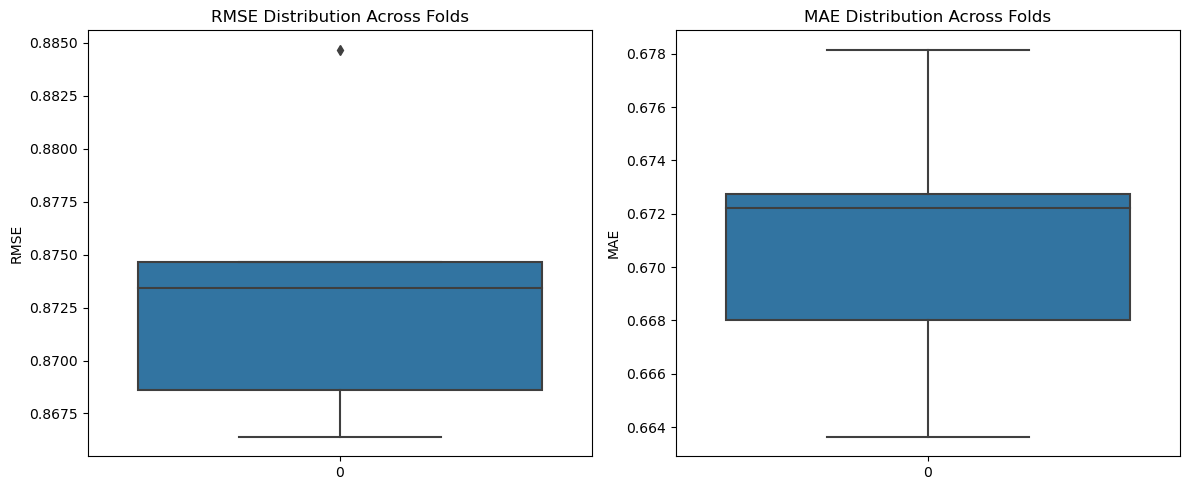

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract RMSE and MAE from cross-validation results
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, return_train_measures=True)

# Plot RMSE and MAE
plt.figure(figsize=(12, 5))

# RMSE plot
plt.subplot(1, 2, 1)
sns.boxplot(data=cv_results['test_rmse'])
plt.title('RMSE Distribution Across Folds')
plt.ylabel('RMSE')

# MAE plot
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_results['test_mae'])
plt.title('MAE Distribution Across Folds')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

The boxplots show the distribution of RMSE and MAE across the 5-fold cross-validation. The model's performance is consistent, with small variations between folds.

## Investigate popular movies or genres in the dataset

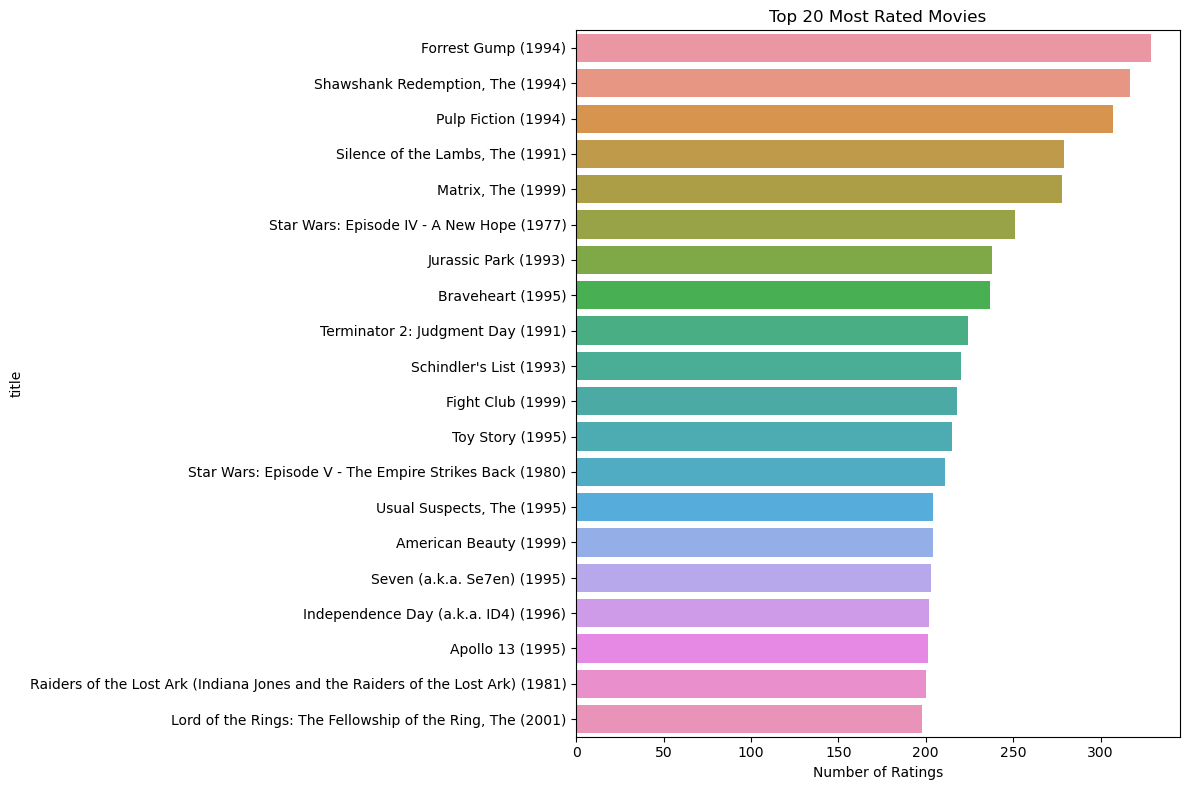

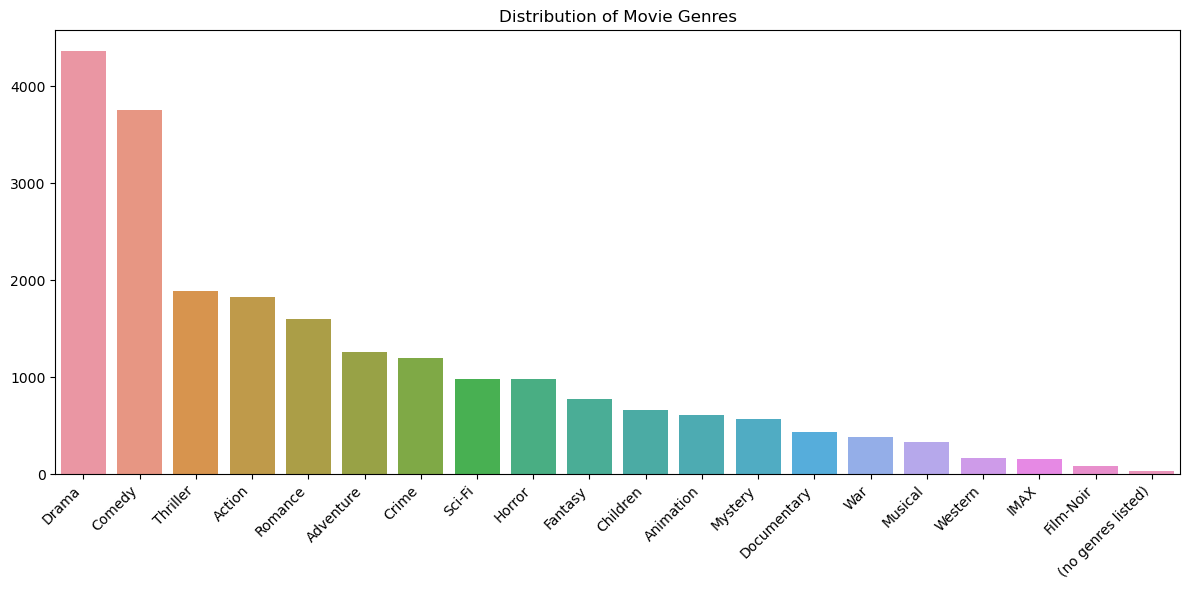

Top 10 most popular movies:
                                          title  num_ratings  avg_rating
3158                        Forrest Gump (1994)          329    4.164134
7593           Shawshank Redemption, The (1994)          317    4.429022
6865                        Pulp Fiction (1994)          307    4.197068
7680           Silence of the Lambs, The (1991)          279    4.161290
5512                         Matrix, The (1999)          278    4.192446
8001  Star Wars: Episode IV - A New Hope (1977)          251    4.231076
4662                       Jurassic Park (1993)          238    3.750000
1337                          Braveheart (1995)          237    4.031646
8363          Terminator 2: Judgment Day (1991)          224    3.970982
7421                    Schindler's List (1993)          220    4.225000
Top 10 genres:
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror    

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge ratings with movies
merged_df = pd.merge(ratings, movies_df, on='movieId')

# Calculate average rating and number of ratings for each movie
movie_stats = merged_df.groupby('title').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['title', 'avg_rating', 'num_ratings']

# Sort by number of ratings (popularity) and get top 20
top_20_popular = movie_stats.sort_values('num_ratings', ascending=False).head(20)

# Plot top 20 popular movies
plt.figure(figsize=(12, 8))
sns.barplot(x='num_ratings', y='title', data=top_20_popular)
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Analyze genres
genres = movies_df['genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)

# Plot genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 most popular movies:")
print(top_20_popular[['title', 'num_ratings', 'avg_rating']].head(10))

print("\
Top 10 genres:")
print(genre_counts.head(10))